# MOB NETWORK

Network analysis of the Sicilian Mafia clans of Mistretta and Batanesi, investigated during the Police operation "Montagna" in 2007.

This analysis has been inspired by the article: [Cavallaro, Lucia, et al. "Disrupting resilient criminal networks through data analysis: The case of Sicilian Mafia." (2020)](https://arxiv.org/abs/2003.05303)

The dataset is available on [github/lcucav/networkdisruption](https://github.com/lcucav/networkdisruption/tree/master/src/Datasets)

In [1]:
# libraries import
import numpy as np
import pandas as pd
import networkx as nx
import networkx.algorithms.community as community

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import linregress
import itertools
from collections import Counter



## Preprocessing

Upload dataset meetings in person

In [2]:
file_path = 'Dataset/Montagna_meetings_edgelist.csv'
df_meetings_w = pd.read_csv(file_path, delimiter='\t')
df_meetings_w.head()

,0,1,1.1
0,0,2,1
1,1,2,1
2,3,4,1
3,3,5,1
4,3,6,1


In [3]:
# rename columns
df_meetings_w.rename(columns={'0':'v_i', '1':'v_j', '1.1':'weight'}, inplace=True)

In [4]:
df_meetings_w.head()

,v_i,v_j,weight
0,0,2,1
1,1,2,1
2,3,4,1
3,3,5,1
4,3,6,1


## Graph creation

create Graph

In [5]:
G = nx.Graph() # weighted
Gu = nx.Graph() # unweighted

In [6]:
# weighted
for _, row in df_meetings_w.iterrows():
    G.add_edge(row['v_i'], row['v_j'], weight=row['weight'])


In [7]:
# unweighted
for _, row in df_meetings_w.iterrows():
    Gu.add_edge(row['v_i'], row['v_j'])

In [8]:
print(G)

Graph with 101 nodes and 255 edges


In [9]:
print(Gu)

Graph with 101 nodes and 255 edges


In [10]:
# Degree of each node weighted
degree = dict(G.degree(weight='weight'))
degree = dict(sorted(degree.items()))

In [11]:
# Degree of each node unweighted
degree_u = dict(Gu.degree())
degree_u = dict(sorted(degree_u.items()))

In [12]:
print(degree)

{0: 1, 1: 1, 2: 2, 3: 8, 4: 6, 5: 10, 6: 10, 7: 6, 8: 6, 9: 6, 10: 5, 11: 15, 12: 21, 13: 10, 14: 10, 15: 10, 16: 1, 17: 1, 18: 30, 19: 11, 20: 2, 21: 2, 22: 22, 23: 10, 24: 1, 25: 17, 26: 2, 27: 27, 28: 5, 29: 23, 30: 2, 31: 3, 32: 2, 33: 4, 34: 8, 35: 5, 36: 11, 37: 2, 38: 7, 39: 7, 40: 3, 41: 3, 42: 3, 43: 13, 44: 3, 45: 24, 46: 4, 47: 54, 48: 24, 49: 4, 50: 18, 51: 23, 52: 3, 53: 2, 54: 7, 55: 2, 56: 1, 57: 1, 58: 2, 59: 2, 60: 2, 61: 4, 62: 1, 63: 8, 64: 13, 65: 1, 66: 1, 67: 1, 68: 25, 69: 1, 70: 15, 71: 2, 72: 3, 73: 1, 74: 1, 75: 5, 76: 9, 77: 5, 78: 2, 79: 5, 80: 3, 81: 3, 82: 3, 83: 2, 84: 4, 85: 9, 86: 4, 87: 4, 88: 2, 89: 34, 90: 4, 91: 2, 92: 2, 93: 11, 94: 2, 95: 3, 96: 1, 97: 3, 98: 2, 99: 1, 100: 4}


In [13]:
print(degree_u)

{0: 1, 1: 1, 2: 2, 3: 8, 4: 6, 5: 10, 6: 10, 7: 6, 8: 6, 9: 6, 10: 5, 11: 12, 12: 16, 13: 6, 14: 6, 15: 6, 16: 1, 17: 1, 18: 24, 19: 9, 20: 2, 21: 2, 22: 14, 23: 8, 24: 1, 25: 13, 26: 2, 27: 16, 28: 5, 29: 13, 30: 2, 31: 2, 32: 2, 33: 3, 34: 6, 35: 5, 36: 8, 37: 2, 38: 3, 39: 7, 40: 3, 41: 3, 42: 3, 43: 9, 44: 3, 45: 12, 46: 4, 47: 19, 48: 12, 49: 4, 50: 8, 51: 11, 52: 3, 53: 2, 54: 6, 55: 2, 56: 1, 57: 1, 58: 2, 59: 2, 60: 2, 61: 4, 62: 1, 63: 4, 64: 6, 65: 1, 66: 1, 67: 1, 68: 15, 69: 1, 70: 6, 71: 2, 72: 2, 73: 1, 74: 1, 75: 4, 76: 7, 77: 3, 78: 2, 79: 5, 80: 3, 81: 3, 82: 3, 83: 2, 84: 4, 85: 8, 86: 4, 87: 4, 88: 2, 89: 12, 90: 2, 91: 2, 92: 2, 93: 6, 94: 2, 95: 3, 96: 1, 97: 3, 98: 2, 99: 1, 100: 4}


In [14]:
# checking which nodes have different degrees between weighted and unweighted
difference_degree = {}
for i in degree.keys():
    if degree[i] == degree_u[i]:
        continue
    else:
        difference_degree.update({i : degree[i] - degree_u[i]})
    
print(difference_degree)
print(f'Number of different links = {len(difference_degree)}')

{11: 3, 12: 5, 13: 4, 14: 4, 15: 4, 18: 6, 19: 2, 22: 8, 23: 2, 25: 4, 27: 11, 29: 10, 31: 1, 33: 1, 34: 2, 36: 3, 38: 4, 43: 4, 45: 12, 47: 35, 48: 12, 50: 10, 51: 12, 54: 1, 63: 4, 64: 7, 68: 10, 70: 9, 72: 1, 75: 1, 76: 2, 77: 2, 85: 1, 89: 22, 90: 2, 93: 5}
Number of different links = 36


#### Plot Weighted Graph

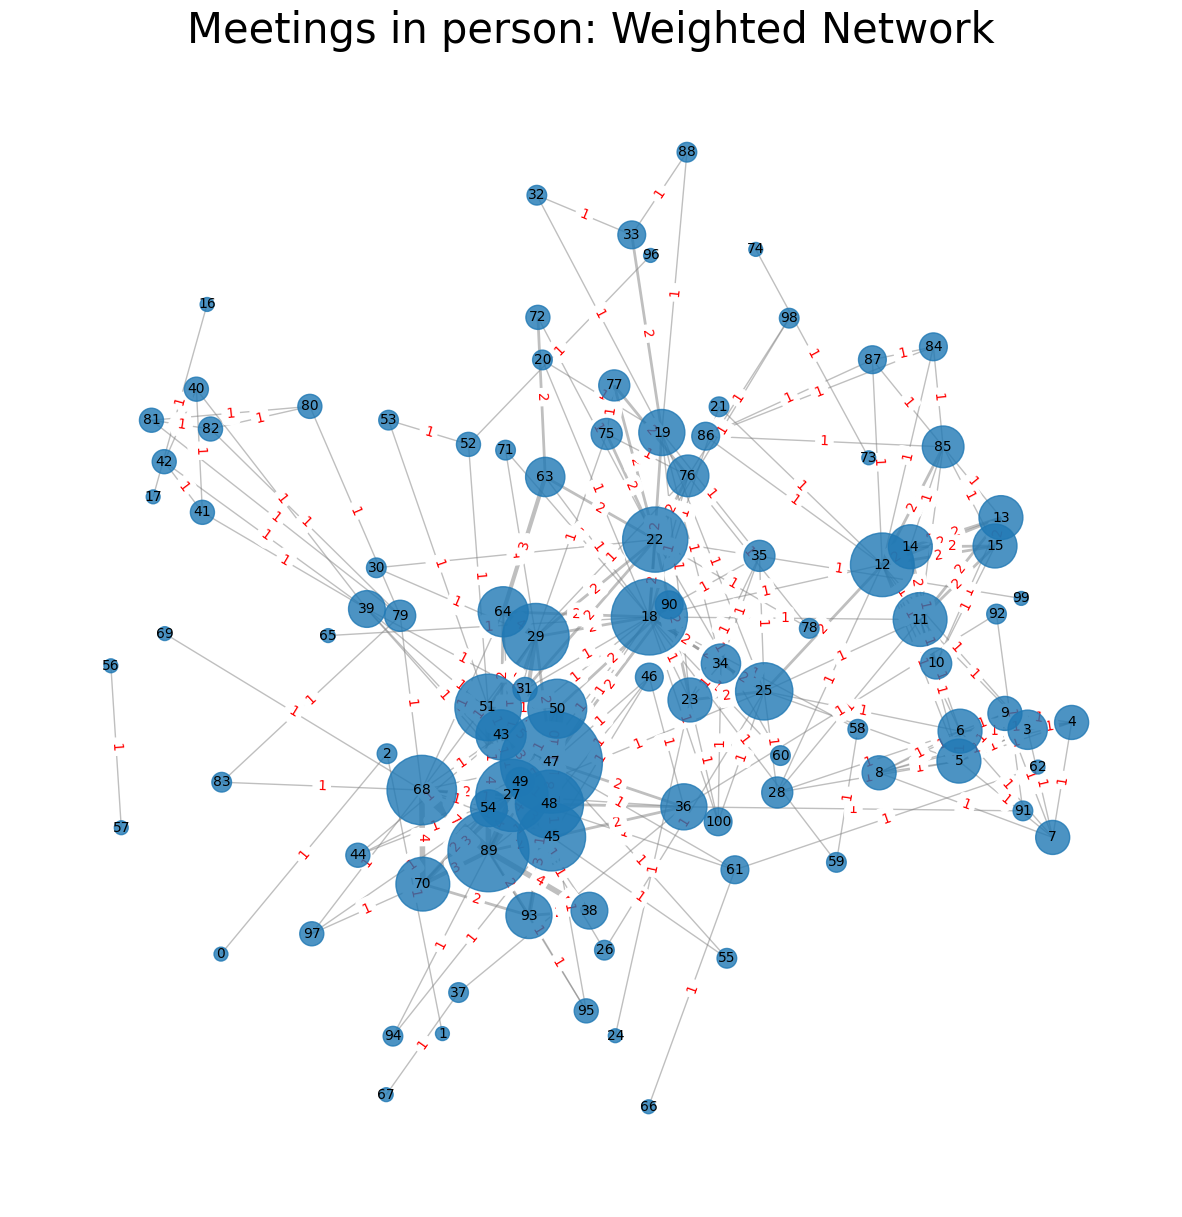

In [15]:
# Visualize the graph
plt.figure(figsize=(15, 15)) 

# Use spring layout with a higher k value to spread nodes apart
pos = nx.spring_layout(G, k=0.5)

# Drawing nodes
node_sizes = [degree[node] * 100 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, alpha=0.8)

# Drawing edges
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5, edge_color='gray')

# Adding labels
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Adding edge weight labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Title
plt.title('Meetings in person: Weighted Network', fontsize=30)

# Show plot
plt.axis('off')
plt.show()

#### Plot Unweighted Graph

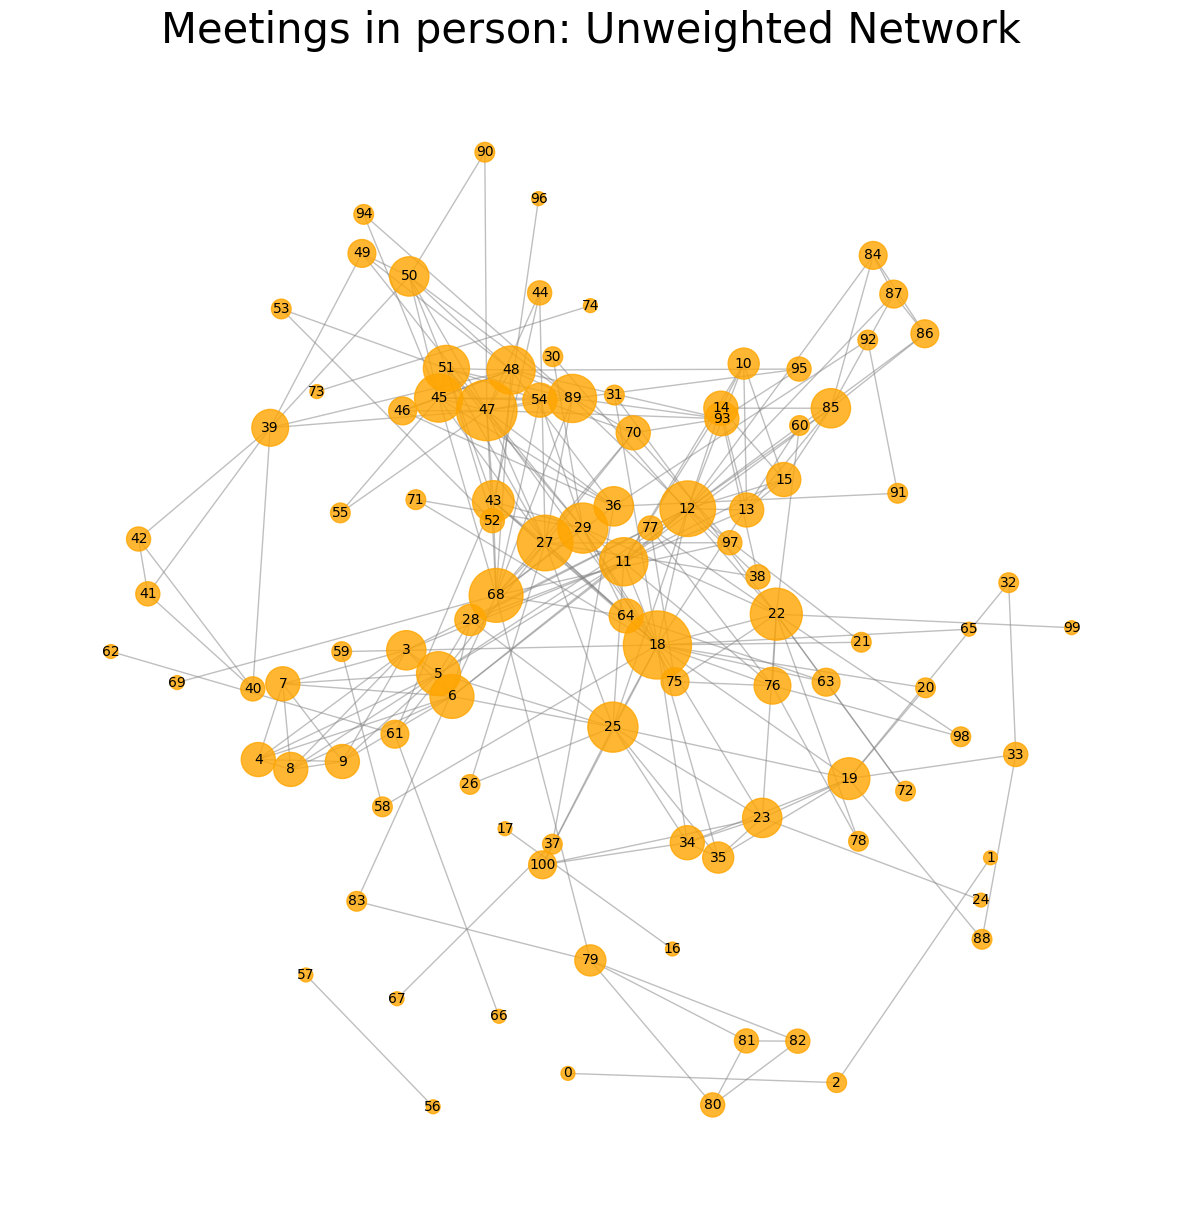

In [16]:
# Visualize the unweighted graph
plt.figure(figsize=(15, 15))

# Use spring layout with a higher k value to spread nodes apart
pos = nx.spring_layout(Gu, k=0.5)

# Drawing nodes
node_sizes = [degree_u[node] * 100 for node in Gu.nodes()] 
nx.draw_networkx_nodes(Gu, pos, node_size=node_sizes, node_color='orange', alpha=0.8)

# Drawing edges
nx.draw_networkx_edges(Gu, pos, alpha=0.5, edge_color='gray')

# Adding labels
nx.draw_networkx_labels(Gu, pos, font_size=10, font_color='black')

# Title
plt.title('Meetings in person: Unweighted Network', fontsize=30)

# Show plot
plt.axis('off')
plt.show()


## Graph properties

### DENSITY

In [17]:
meetings_density = nx.density(G)
print(f'WN density = {meetings_density}') # weighted network

meetings_density_u = nx.density(Gu)
print(f'UN density = {meetings_density_u}') # unweighted network

WN density = 0.0504950495049505
UN density = 0.0504950495049505


#### Create Random Network

Create Erdos-Renyi random network G(N,p)

In [18]:
# create RN
N = Gu.number_of_nodes()
p = meetings_density_u

random_network = nx.erdos_renyi_graph(N, p, seed=69)

### DEGREE

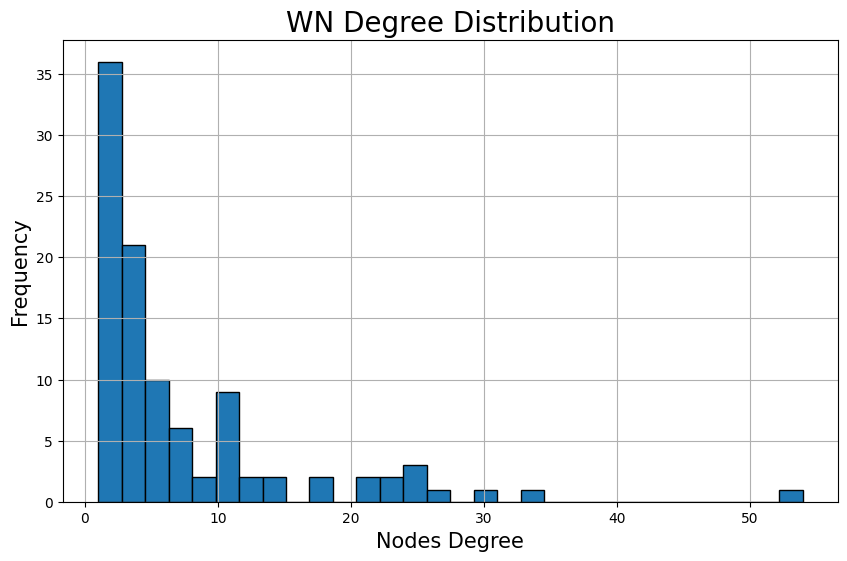

In [19]:
degree_list = list(degree.values())

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degree_list, bins=30, edgecolor='black')
plt.title('WN Degree Distribution', fontsize=20)
plt.xlabel("Nodes Degree", fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True)

# Show plot
plt.show()

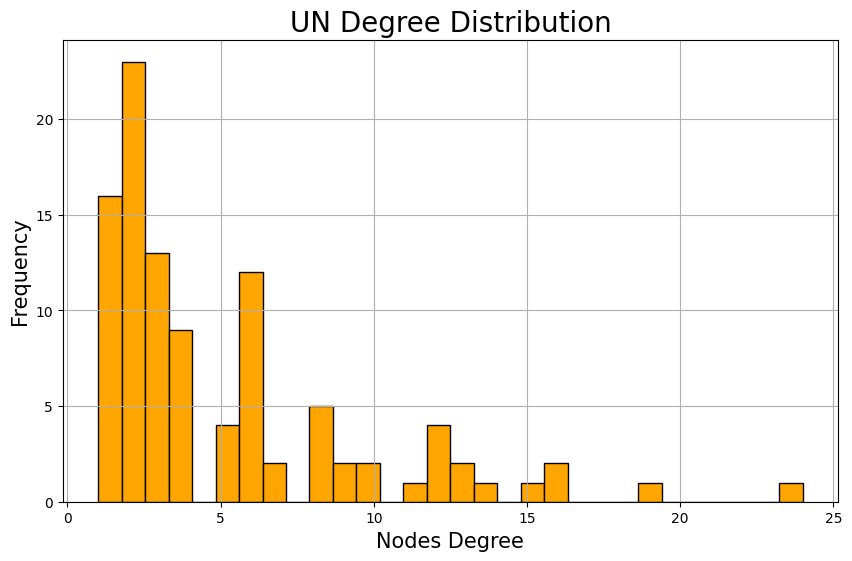

In [20]:
# unweighted
degree_list_u = list(degree_u.values())

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degree_list_u, bins=30, edgecolor='black', color='orange')
plt.title('UN Degree Distribution', fontsize=20)
plt.xlabel("Nodes Degree", fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True)

# Show plot
plt.show()

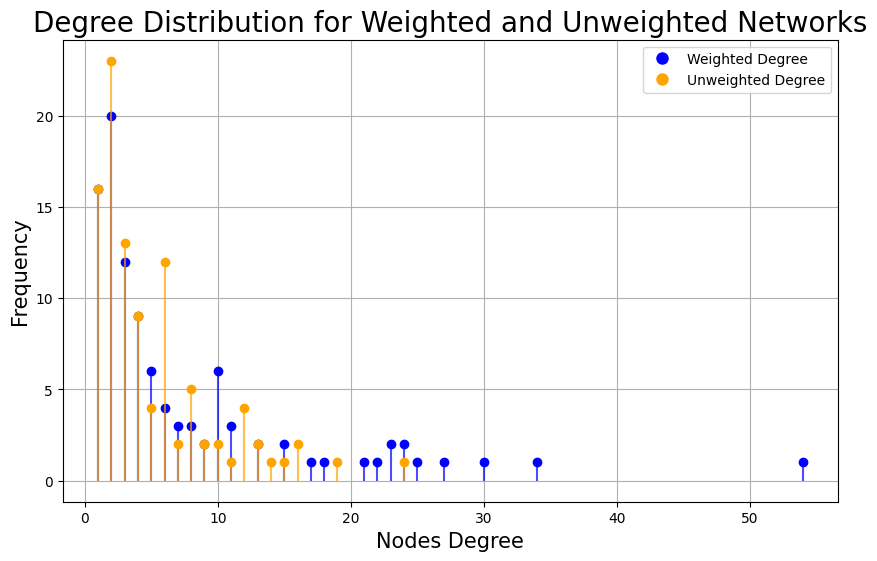

In [21]:
# Plot the degree distribution
plt.figure(figsize=(10, 6))

# Vertical lines with dots for weighted degree
weighted_degree_counts = pd.Series(degree_list).value_counts().sort_index()
for d, count in weighted_degree_counts.items():
    plt.vlines(x=d, ymin=0, ymax=count, color='blue', alpha=0.7)
    plt.plot(d, count, 'o', color='blue')

# Vertical lines with dots for unweighted degree
unweighted_degree_counts = pd.Series(degree_list_u).value_counts().sort_index()
for d, count in unweighted_degree_counts.items():
    plt.vlines(x=d, ymin=0, ymax=count, color='orange', alpha=0.7)
    plt.plot(d, count, 'o', color='orange')

# Add title and labels
plt.title('Degree Distribution for Weighted and Unweighted Networks', fontsize=20)
plt.xlabel("Nodes Degree", fontsize=15)
plt.ylabel('Frequency', fontsize=15)

# Add grid
plt.grid(True)

# Create custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Weighted Degree'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Unweighted Degree')
]
plt.legend(handles=legend_elements)

# Show plot
plt.show()

#### Weighted

In [22]:
# weighted
avg_degree = np.mean(degree_list)
min_degree = np.min(degree_list)
max_degree = np.max(degree_list)
std_degree = np.std(degree_list)
median_degree = np.median(degree_list)

print('WEIGHTED:')
print(f'AVG DEGREE = {avg_degree}')
print(f'MIN DEGREE = {min_degree}')
print(f'MAX DEGREE = {max_degree}')
print(f'STD DEGREE = {std_degree}')
print(f'MEDIAN DEGREE = {median_degree}')

WEIGHTED:
AVG DEGREE = 7.287128712871287
MIN DEGREE = 1
MAX DEGREE = 54
STD DEGREE = 8.6771997053201
MEDIAN DEGREE = 4.0


#### Unweighted

In [23]:
# unweighted
avg_degree_u = np.mean(degree_list_u)
min_degree_u = np.min(degree_list_u)
max_degree_u = np.max(degree_list_u)
std_degree_u = np.std(degree_list_u)
median_degree_u = np.median(degree_list_u)

print('UNWEIGHTED:')
print(f'AVG DEGREE = {avg_degree_u}')
print(f'MIN DEGREE = {min_degree_u}')
print(f'MAX DEGREE = {max_degree_u}')
print(f'STD DEGREE = {std_degree_u}')
print(f'MEDIAN DEGREE = {median_degree_u}')

UNWEIGHTED:
AVG DEGREE = 5.0495049504950495
MIN DEGREE = 1
MAX DEGREE = 24
STD DEGREE = 4.4618875320861004
MEDIAN DEGREE = 3.0


##### Degree distribution

Compute p_k = N_k/N

In [24]:
degree_count_u = {}
degree_distribution_u = {}
for degree in degree_list_u:
    if degree in degree_count_u:
        degree_count_u[degree] += 1
    else:
        degree_count_u[degree] = 1
degree_count_u = dict(sorted(degree_count_u.items()))

for k, n_k in degree_count_u.items():
    degree_distribution_u.update({k: n_k/N})


#### RN comparison

In [25]:
# degree
degree_rn = dict(random_network.degree())
degree_rn = dict(sorted(degree_rn.items()))
degree_list_rn = list(degree_rn.values())

avg_degree_rn = np.mean(degree_list_rn)
min_degree_rn = np.min(degree_list_rn)
max_degree_rn = np.max(degree_list_rn)
std_degree_rn = np.std(degree_list_rn)
median_degree_rn = np.median(degree_list_rn)

print('RANDOM NETWORK:')
print(f'AVG DEGREE = {avg_degree_rn}')
print(f'MIN DEGREE = {min_degree_rn}')
print(f'MAX DEGREE = {max_degree_rn}')
print(f'STD DEGREE = {std_degree_rn}')
print(f'MEDIAN DEGREE = {median_degree_rn}')

RANDOM NETWORK:
AVG DEGREE = 4.871287128712871
MIN DEGREE = 1
MAX DEGREE = 11
STD DEGREE = 2.056929203750161
MEDIAN DEGREE = 5.0


##### RN Degree Distribution

In [26]:
degree_count_rn = {}
degree_distribution_rn = {}
for degree in degree_list_rn:
    if degree in degree_count_rn:
        degree_count_rn[degree] += 1
    else:
        degree_count_rn[degree] = 1
degree_count_rn = dict(sorted(degree_count_rn.items()))

for k, n_k in degree_count_rn.items():
    degree_distribution_rn.update({k: n_k/N})

In [27]:
print(list(degree_distribution_u.keys()))
print(degree_distribution_u.values())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 24]
dict_values([0.15841584158415842, 0.22772277227722773, 0.12871287128712872, 0.0891089108910891, 0.039603960396039604, 0.1188118811881188, 0.019801980198019802, 0.04950495049504951, 0.019801980198019802, 0.019801980198019802, 0.009900990099009901, 0.039603960396039604, 0.019801980198019802, 0.009900990099009901, 0.009900990099009901, 0.019801980198019802, 0.009900990099009901, 0.009900990099009901])


Plot

In [28]:
# depending on the RN, this cell might raise an error. If that's the case, generate a new RN and try again

# Convert degree distribution to log-log scale
log_degrees_u = np.log(list(degree_distribution_u.keys()))
log_freqs_u = np.log(list(degree_distribution_u.values()))

log_degrees_rn = np.log(list(degree_distribution_rn.keys()))
log_freqs_rn = np.log(list(degree_distribution_rn.values()))

# Fit a line to the log-log data for the real network
slope_u, intercept_u, r_value_u, p_value_u, std_err_u = linregress(log_degrees_u, log_freqs_u)
fit_line_u = slope_u * log_degrees_u + intercept_u

# Fit a polynomial to the log-log data for the random network
poly_coeffs_rn = np.polyfit(log_degrees_rn, log_freqs_rn, deg=2)
poly_fit_rn = np.poly1d(poly_coeffs_rn)

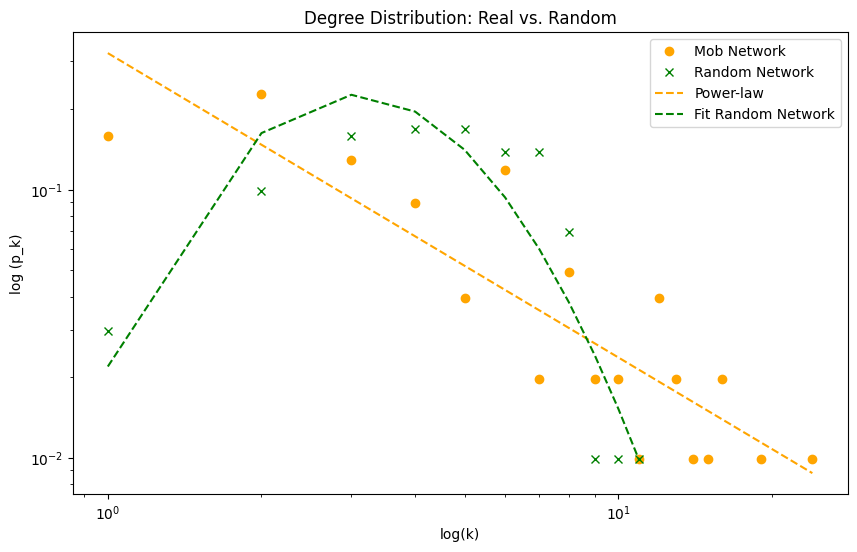

In [29]:
plt.figure(figsize=(10,6))

plt.loglog(degree_distribution_u.keys(),
           degree_distribution_u.values(),
           'o',
           color='orange',
           label='Mob Network')


plt.loglog(degree_distribution_rn.keys(),
           degree_distribution_rn.values(),
           'x',
           color='green',
           label='Random Network')

plt.plot(np.exp(log_degrees_u),
         np.exp(fit_line_u),
         '--',
         color='orange',
         label='Power-law')

plt.plot(np.exp(log_degrees_rn),
         np.exp(poly_fit_rn(log_degrees_rn)),
         '--',
         color='green',
         label='Fit Random Network')

plt.ylabel('log (p_k)')
plt.xlabel('log(k)')
plt.legend()
plt.title('Degree Distribution: Real vs. Random')
plt.show()



For large k, the power-law is above the Random Network distribution: meaning a higher chance to find high degree values in the Mob network compared to the RN

### WEIGHTS

In [30]:
# Extract edge weights
edge_weights = [data['weight'] for v_i, v_j, data in G.edges(data=True)]


In [31]:
average_weight = np.mean(edge_weights)
min_weight = np.min(edge_weights)
max_weight = np.max(edge_weights)
std_weight = np.std(edge_weights)
median_weight = np.median(edge_weights)

print(f"Average Weight = {average_weight}")
print(f"Minimum Weight = {min_weight}")
print(f"Maximum Weight = {max_weight}")
print(f"Standard Deviation of Weights = {std_weight}")
print(f"Median Weight = {median_weight}")

Average Weight = 1.4431372549019608
Minimum Weight = 1
Maximum Weight = 10
Standard Deviation of Weights = 1.0899280245998588
Median Weight = 1.0


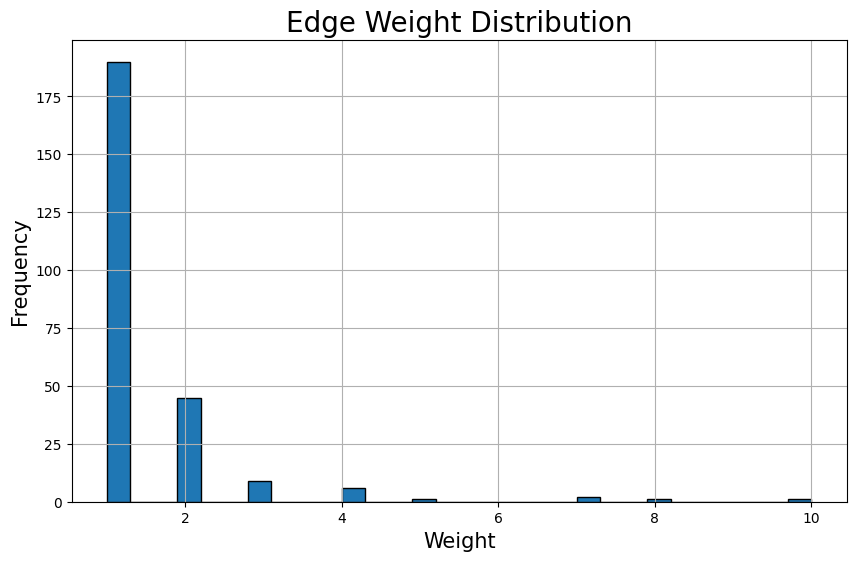

In [32]:
# Plot histogram of edge weights
plt.figure(figsize=(10, 6))
plt.hist(edge_weights, bins=30, edgecolor='black')
plt.title('Edge Weight Distribution', fontsize=20)
plt.xlabel('Weight', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True)
plt.show()

### CENTRALITY

#### Weighted

In [33]:
# Centrality measures
norm_centrality = dict(sorted({node: sum(weight for _, _, weight in G.edges(node, data='weight'))/(G.number_of_nodes()-1) for node in G.nodes()}.items()))
betweenness_centrality = dict(sorted(nx.betweenness_centrality(G, weight='weight').items()))
closeness_centrality = dict(sorted(nx.closeness_centrality(G, distance='weight').items()))
eigenvector_centrality = dict(sorted(nx.eigenvector_centrality(G, weight='weight').items()))

print('WEIGHTED')
print("Centrality = ", degree)
print('Normalized Centrality = ', norm_centrality)
print(f"Betweenness Centrality = {betweenness_centrality}")
print(f'Closeness Centrality = {closeness_centrality}')
print(f'Eigenvector Centrality = {eigenvector_centrality}')

WEIGHTED
Centrality =  7
Normalized Centrality =  {0: 0.01, 1: 0.01, 2: 0.02, 3: 0.08, 4: 0.06, 5: 0.1, 6: 0.1, 7: 0.06, 8: 0.06, 9: 0.06, 10: 0.05, 11: 0.15, 12: 0.21, 13: 0.1, 14: 0.1, 15: 0.1, 16: 0.01, 17: 0.01, 18: 0.3, 19: 0.11, 20: 0.02, 21: 0.02, 22: 0.22, 23: 0.1, 24: 0.01, 25: 0.17, 26: 0.02, 27: 0.27, 28: 0.05, 29: 0.23, 30: 0.02, 31: 0.03, 32: 0.02, 33: 0.04, 34: 0.08, 35: 0.05, 36: 0.11, 37: 0.02, 38: 0.07, 39: 0.07, 40: 0.03, 41: 0.03, 42: 0.03, 43: 0.13, 44: 0.03, 45: 0.24, 46: 0.04, 47: 0.54, 48: 0.24, 49: 0.04, 50: 0.18, 51: 0.23, 52: 0.03, 53: 0.02, 54: 0.07, 55: 0.02, 56: 0.01, 57: 0.01, 58: 0.02, 59: 0.02, 60: 0.02, 61: 0.04, 62: 0.01, 63: 0.08, 64: 0.13, 65: 0.01, 66: 0.01, 67: 0.01, 68: 0.25, 69: 0.01, 70: 0.15, 71: 0.02, 72: 0.03, 73: 0.01, 74: 0.01, 75: 0.05, 76: 0.09, 77: 0.05, 78: 0.02, 79: 0.05, 80: 0.03, 81: 0.03, 82: 0.03, 83: 0.02, 84: 0.04, 85: 0.09, 86: 0.04, 87: 0.04, 88: 0.02, 89: 0.34, 90: 0.04, 91: 0.02, 92: 0.02, 93: 0.11, 94: 0.02, 95: 0.03, 96: 0.

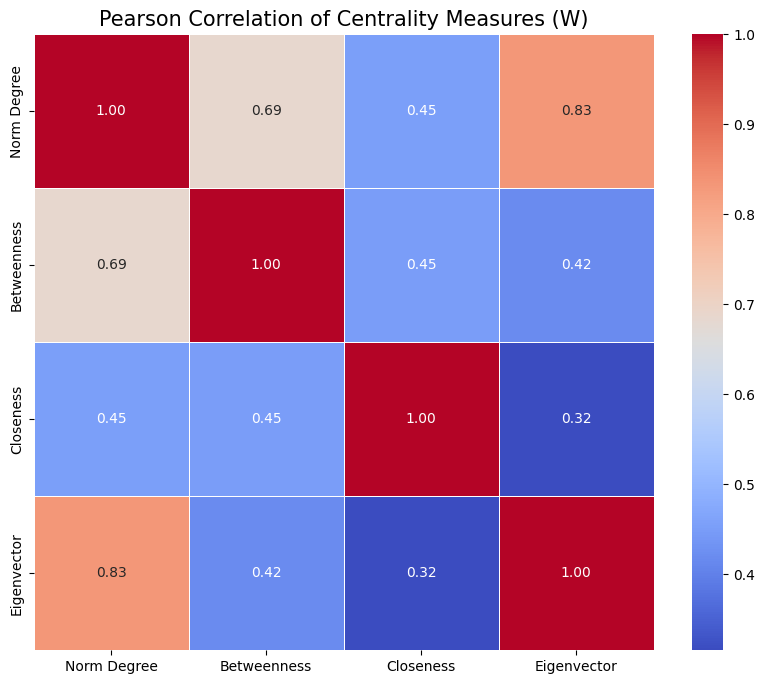

In [34]:
# Create a DataFrame from the centrality measures
centrality_df = pd.DataFrame({
    'Norm Degree': pd.Series(norm_centrality),
    'Betweenness': pd.Series(betweenness_centrality),
    'Closeness': pd.Series(closeness_centrality),
    'Eigenvector': pd.Series(eigenvector_centrality)
})

# Calculate the correlation matrix
correlation_matrix = centrality_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation of Centrality Measures (W)', fontsize=15)
plt.show()

#### Unweighted

In [35]:
# Centrality measures
norm_centrality_u = dict(sorted(nx.degree_centrality(Gu).items()))
betweenness_centrality_u = dict(sorted(nx.betweenness_centrality(Gu).items()))
closeness_centrality_u = dict(sorted(nx.closeness_centrality(Gu).items()))
eigenvector_centrality_u = dict(sorted(nx.eigenvector_centrality(Gu).items()))

print('UNWEIGHTED')
print("Centrality = ", degree_u)
print('Normalized Centrality = ', norm_centrality_u)
print(f"Betweenness Centrality = {betweenness_centrality_u}")
print(f'Closeness Centrality = {closeness_centrality_u}')
print(f'Eigenvector Centrality = {eigenvector_centrality_u}')

UNWEIGHTED
Centrality =  {0: 1, 1: 1, 2: 2, 3: 8, 4: 6, 5: 10, 6: 10, 7: 6, 8: 6, 9: 6, 10: 5, 11: 12, 12: 16, 13: 6, 14: 6, 15: 6, 16: 1, 17: 1, 18: 24, 19: 9, 20: 2, 21: 2, 22: 14, 23: 8, 24: 1, 25: 13, 26: 2, 27: 16, 28: 5, 29: 13, 30: 2, 31: 2, 32: 2, 33: 3, 34: 6, 35: 5, 36: 8, 37: 2, 38: 3, 39: 7, 40: 3, 41: 3, 42: 3, 43: 9, 44: 3, 45: 12, 46: 4, 47: 19, 48: 12, 49: 4, 50: 8, 51: 11, 52: 3, 53: 2, 54: 6, 55: 2, 56: 1, 57: 1, 58: 2, 59: 2, 60: 2, 61: 4, 62: 1, 63: 4, 64: 6, 65: 1, 66: 1, 67: 1, 68: 15, 69: 1, 70: 6, 71: 2, 72: 2, 73: 1, 74: 1, 75: 4, 76: 7, 77: 3, 78: 2, 79: 5, 80: 3, 81: 3, 82: 3, 83: 2, 84: 4, 85: 8, 86: 4, 87: 4, 88: 2, 89: 12, 90: 2, 91: 2, 92: 2, 93: 6, 94: 2, 95: 3, 96: 1, 97: 3, 98: 2, 99: 1, 100: 4}
Normalized Centrality =  {0: 0.01, 1: 0.01, 2: 0.02, 3: 0.08, 4: 0.06, 5: 0.1, 6: 0.1, 7: 0.06, 8: 0.06, 9: 0.06, 10: 0.05, 11: 0.12, 12: 0.16, 13: 0.06, 14: 0.06, 15: 0.06, 16: 0.01, 17: 0.01, 18: 0.24, 19: 0.09, 20: 0.02, 21: 0.02, 22: 0.14, 23: 0.08, 24: 0.0

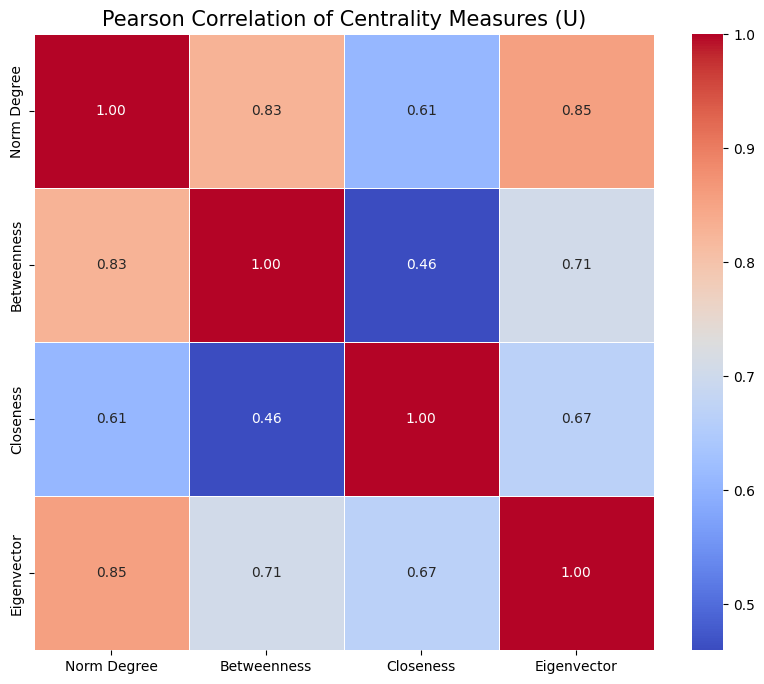

In [36]:
# Create a DataFrame from the centrality measures
centrality_df_u = pd.DataFrame({
    'Norm Degree': pd.Series(norm_centrality_u),
    'Betweenness': pd.Series(betweenness_centrality_u),
    'Closeness': pd.Series(closeness_centrality_u),
    'Eigenvector': pd.Series(eigenvector_centrality_u)
})

# Calculate the correlation matrix
correlation_matrix_u = centrality_df_u.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_u, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation of Centrality Measures (U)', fontsize=15)
plt.show()

### CONNECTIVITY

The Graph, as seen from the plot, is disconnected. Let's analyze the connected components

#### Weighted

In [37]:
# Connectivity Analysis
print(f'Number of connected components = {nx.number_connected_components(G)}')

cc_order = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
print(f'Order of the connected components = {cc_order}')

# Create LCC subgraph
lcc_nodes = max(nx.connected_components(G), key=len)
lcc = G.subgraph(lcc_nodes).copy()
print(f'Largest connected component is a {lcc}')
print(f'LCC consist of {(len(lcc)/len(G))*100:.3f}% the whole network')

# LCC connectivity
lcc_vertex_connectivity = nx.node_connectivity(lcc)
lcc_edge_connectivity = nx.edge_connectivity(lcc)
print(f"LCC Vertex Connectivity = {lcc_vertex_connectivity}")
print(f"LCC Edge Connectivity = {lcc_edge_connectivity}")

# LCC path analysis
lcc_shortest_paths = dict(nx.all_pairs_dijkstra_path_length(lcc, weight='weight'))
lcc_avg_path_length = nx.average_shortest_path_length(lcc, weight='weight')
#  lcc_diameter = nx.diameter(lcc, weight='weight') # Idk why the nx.diameter() raises error when given the weight parameter
lcc_diameter = max(nx.eccentricity(lcc, sp=lcc_shortest_paths).values())
# print(f'LCC Shortest path = {lcc_shortest_paths}')
print(f'LCC avg path length = {lcc_avg_path_length:.3f}')
print(f'LCC Diameter = {lcc_diameter}')

Number of connected components = 5
Order of the connected components = [92, 3, 2, 2, 2]
Largest connected component is a Graph with 92 nodes and 250 edges
LCC consist of 91.089% the whole network
LCC Vertex Connectivity = 1
LCC Edge Connectivity = 1
LCC avg path length = 3.841
LCC Diameter = 9


#### Unweighted

In [38]:
# Create LCC subgraph
lcc_u = Gu.subgraph(lcc_nodes).copy()
print(f'Largest connected component is a {lcc_u}')
print(f'LCC consist of {(len(lcc_u)/len(Gu))*100:.3f}% the whole network')

# LCC connectivity
lcc_vertex_connectivity_u = nx.node_connectivity(lcc_u)
lcc_edge_connectivity_u = nx.edge_connectivity(lcc_u)
print(f"LCC Vertex Connectivity = {lcc_vertex_connectivity_u}")
print(f"LCC Edge Connectivity = {lcc_edge_connectivity_u}")


# LCC path analysis
lcc_shortest_paths_u = dict(nx.all_pairs_dijkstra_path_length(lcc_u))
lcc_avg_path_length_u = nx.average_shortest_path_length(lcc_u)
lcc_diameter_u = nx.diameter(lcc_u)
# print(f'LCC Shortest path = {lcc_shortest_paths}')
print(f'LCC avg path length = {lcc_avg_path_length_u:.3f}')
print(f'LCC Diameter = {lcc_diameter_u}')

Largest connected component is a Graph with 92 nodes and 250 edges
LCC consist of 91.089% the whole network
LCC Vertex Connectivity = 1
LCC Edge Connectivity = 1
LCC avg path length = 3.309
LCC Diameter = 7


##### LCC BRIDGES

In [39]:
print('Are there bridges in the LCC? ', nx.has_bridges(lcc_u))

lcc_bridges_u = list(nx.bridges(lcc_u))
print(f'In this subgraph there are {len(lcc_bridges_u)} bridges out of {lcc_u.size()} edges.')
print('Bridges = ', lcc_bridges_u)

Are there bridges in the LCC?  True
In this subgraph there are 9 bridges out of 250 edges.
Bridges =  [(18, 65), (22, 99), (23, 24), (36, 37), (37, 67), (52, 96), (61, 62), (61, 66), (68, 69)]


#### RN Comparison

In [40]:
print(f'Number of connected components = {nx.number_connected_components(random_network)}')

# RN connectivity
vertex_connectivity_rn = nx.node_connectivity(random_network)
edge_connectivity_rn = nx.edge_connectivity(random_network)
print(f"RN Vertex Connectivity = {vertex_connectivity_rn}")
print(f"RN Edge Connectivity = {edge_connectivity_rn}")

# RN path analysis
shortest_paths_rn = dict(nx.all_pairs_dijkstra_path_length(random_network))
avg_path_length_rn = nx.average_shortest_path_length(random_network)
diameter_rn = nx.diameter(random_network)
print(f'RN avg path length = {avg_path_length_rn:.3f}')
print(f'RN Diameter = {diameter_rn}')


Number of connected components = 1
RN Vertex Connectivity = 1
RN Edge Connectivity = 1
RN avg path length = 3.082
RN Diameter = 6


##### RN Bridges

In [41]:
print('Are there bridges in the RN? ', nx.has_bridges(random_network))

bridges_rn = list(nx.bridges(random_network))
print(f'In this RN there are {len(bridges_rn)} bridges out of {random_network.size()} edges.')
print('Bridges = ', bridges_rn)

Are there bridges in the RN?  True
In this RN there are 3 bridges out of 246 edges.
Bridges =  [(5, 63), (48, 80), (68, 94)]


### TRANSITIVITY

#### Weighted

In [42]:
# Clustering Coefficient
local_clustering = nx.clustering(G, weight='weight')
global_clustering = nx.transitivity(G)

# Triadic closure
triangles = nx.triangles(G)
triangles = dict(sorted(triangles.items(), key=lambda item:item[1], reverse=True))

print(f'Avg Local Clustering Coefficient = {np.mean(list(local_clustering.values()))}')
print(f"Global Clustering Coefficient = {global_clustering}")
print('Number of triangles per node = ', triangles)

Avg Local Clustering Coefficient = 0.08330163789447179
Global Clustering Coefficient = 0.41658488714425906
Number of triangles per node =  {47: 48, 18: 38, 12: 36, 27: 33, 11: 29, 68: 29, 45: 28, 48: 28, 5: 27, 6: 27, 25: 27, 89: 27, 29: 26, 51: 22, 3: 20, 43: 19, 50: 16, 85: 16, 4: 15, 7: 15, 8: 15, 9: 15, 22: 15, 13: 14, 14: 14, 15: 14, 23: 14, 19: 13, 34: 13, 10: 10, 28: 10, 35: 10, 36: 10, 64: 10, 39: 9, 54: 9, 76: 9, 70: 7, 93: 7, 46: 6, 49: 6, 84: 6, 86: 6, 87: 6, 100: 6, 75: 5, 79: 4, 40: 3, 41: 3, 42: 3, 44: 3, 63: 3, 77: 3, 80: 3, 81: 3, 82: 3, 95: 3, 97: 3, 33: 2, 38: 2, 20: 1, 21: 1, 26: 1, 30: 1, 31: 1, 32: 1, 52: 1, 53: 1, 55: 1, 58: 1, 59: 1, 60: 1, 61: 1, 71: 1, 72: 1, 78: 1, 83: 1, 88: 1, 90: 1, 91: 1, 92: 1, 94: 1, 98: 1, 0: 0, 2: 0, 1: 0, 16: 0, 17: 0, 24: 0, 37: 0, 56: 0, 57: 0, 62: 0, 65: 0, 66: 0, 67: 0, 69: 0, 73: 0, 74: 0, 96: 0, 99: 0}


#### Unweighted

In [43]:
local_clustering_u = nx.clustering(Gu)
global_clustering_u = nx.transitivity(Gu)

print(f'Avg Local Clustering Coefficient = {np.mean(list(local_clustering_u.values()))}')
print(f"Global Clustering Coefficient = {global_clustering_u}")
print('Number of triangles per node = ', triangles) # number of triangles is the same as for the weighted

Avg Local Clustering Coefficient = 0.6267773883657383
Global Clustering Coefficient = 0.41658488714425906
Number of triangles per node =  {47: 48, 18: 38, 12: 36, 27: 33, 11: 29, 68: 29, 45: 28, 48: 28, 5: 27, 6: 27, 25: 27, 89: 27, 29: 26, 51: 22, 3: 20, 43: 19, 50: 16, 85: 16, 4: 15, 7: 15, 8: 15, 9: 15, 22: 15, 13: 14, 14: 14, 15: 14, 23: 14, 19: 13, 34: 13, 10: 10, 28: 10, 35: 10, 36: 10, 64: 10, 39: 9, 54: 9, 76: 9, 70: 7, 93: 7, 46: 6, 49: 6, 84: 6, 86: 6, 87: 6, 100: 6, 75: 5, 79: 4, 40: 3, 41: 3, 42: 3, 44: 3, 63: 3, 77: 3, 80: 3, 81: 3, 82: 3, 95: 3, 97: 3, 33: 2, 38: 2, 20: 1, 21: 1, 26: 1, 30: 1, 31: 1, 32: 1, 52: 1, 53: 1, 55: 1, 58: 1, 59: 1, 60: 1, 61: 1, 71: 1, 72: 1, 78: 1, 83: 1, 88: 1, 90: 1, 91: 1, 92: 1, 94: 1, 98: 1, 0: 0, 2: 0, 1: 0, 16: 0, 17: 0, 24: 0, 37: 0, 56: 0, 57: 0, 62: 0, 65: 0, 66: 0, 67: 0, 69: 0, 73: 0, 74: 0, 96: 0, 99: 0}


##### RN Comparison

In [44]:
# Clustering Coefficient
local_clustering_rn = nx.clustering(random_network)
global_clustering_rn = nx.transitivity(random_network)

# Triadic closure
triangles_rn = nx.triangles(random_network)
triangles_rn = dict(sorted(triangles_rn.items(), key=lambda item:item[1], reverse=True))

print('RANDOM NETWORK')
print(f'Avg Local Clustering Coefficient = {np.mean(list(local_clustering_rn.values()))}')
print(f"Global Clustering Coefficient = {global_clustering_rn}")
print('Number of triangles per node = ', triangles_rn)

RANDOM NETWORK
Avg Local Clustering Coefficient = 0.04247710485334247
Global Clustering Coefficient = 0.054030874785591765
Number of triangles per node =  {23: 4, 33: 4, 27: 3, 41: 3, 63: 3, 86: 3, 96: 3, 28: 2, 40: 2, 47: 2, 49: 2, 62: 2, 76: 2, 98: 2, 99: 2, 100: 2, 2: 1, 6: 1, 12: 1, 21: 1, 22: 1, 25: 1, 26: 1, 32: 1, 34: 1, 42: 1, 54: 1, 55: 1, 58: 1, 66: 1, 74: 1, 75: 1, 81: 1, 83: 1, 85: 1, 87: 1, 88: 1, 97: 1, 0: 0, 1: 0, 3: 0, 4: 0, 5: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 24: 0, 29: 0, 30: 0, 31: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 43: 0, 44: 0, 45: 0, 46: 0, 48: 0, 50: 0, 51: 0, 52: 0, 53: 0, 56: 0, 57: 0, 59: 0, 60: 0, 61: 0, 64: 0, 65: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 77: 0, 78: 0, 79: 0, 80: 0, 82: 0, 84: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0}


In the Random Network we have clustering coeff. values way smaller than the Mob network

### DEGREE ASSORTATIVITY

#### Weighted

In [45]:
# Degree Assortativity
degree_assortativity = nx.degree_assortativity_coefficient(G, weight='weight')

print('WEIGHTED')
print(f"Degree Assortativity Coefficient = {degree_assortativity}")

WEIGHTED
Degree Assortativity Coefficient = 0.0748892763669043


#### Unweighted

In [46]:
# Degree Assortativity
degree_assortativity_u = nx.degree_assortativity_coefficient(Gu)

print('UNWEIGHTED')
print(f"Degree Assortativity Coefficient = {degree_assortativity_u}")

UNWEIGHTED
Degree Assortativity Coefficient = -0.04342993387946205


##### RN Comparison

In [47]:
# Degree Assortativity
degree_assortativity_rn = nx.degree_assortativity_coefficient(random_network)

print('RANDOM NETWORK')
print(f"Degree Assortativity Coefficient = {degree_assortativity_rn}")

RANDOM NETWORK
Degree Assortativity Coefficient = 0.060692530967661494


### NEIGHBORHOOD SIMILARITY

#### Unweighted

##### Jaccard Coefficient

In [48]:
# get "most connected" nodes
print(f'Top 13 nodes: {dict(itertools.islice(dict(sorted(degree_u.items(), key=lambda item:item[1], reverse=True)).items(), 13))}')
most_connected_u = list(dict(sorted(degree_u.items(), key=lambda item:item[1], reverse=True)).keys())[:13] # take nodes w/ degree > 10

# generate combinations
most_connected_pairs_u = list(itertools.combinations(most_connected_u, 2))

# compute jaccard coefficients
jaccard_coefficients_u = nx.jaccard_coefficient(Gu, ebunch=most_connected_pairs_u)
jaccard_coefficients_u = {(u,v):j for u,v,j in jaccard_coefficients_u}

#print highest jaccard coeffs
print(f'Top Jaccard Coefficients: {dict(itertools.islice(dict(sorted(jaccard_coefficients_u.items(), key=lambda item:item[1], reverse=True)).items(),10))}')


Top 13 nodes: {18: 24, 47: 19, 12: 16, 27: 16, 68: 15, 22: 14, 25: 13, 29: 13, 11: 12, 45: 12, 48: 12, 89: 12, 51: 11}
Top Jaccard Coefficients: {(12, 11): 0.6470588235294118, (47, 45): 0.47619047619047616, (47, 48): 0.47619047619047616, (68, 51): 0.4444444444444444, (45, 48): 0.4117647058823529, (45, 89): 0.4117647058823529, (48, 89): 0.4117647058823529, (47, 51): 0.36363636363636365, (45, 51): 0.35294117647058826, (27, 68): 0.34782608695652173}


### COMMUNITY DETECTION

Use the Louvain Algorithm to find the best community partition

In [49]:
communities = community.louvain_communities(G, weight='weight', resolution=0.9, seed=69)

In [50]:
node_community = {}
for i, c in enumerate(communities):
    for node in c:
        node_community[node] = i

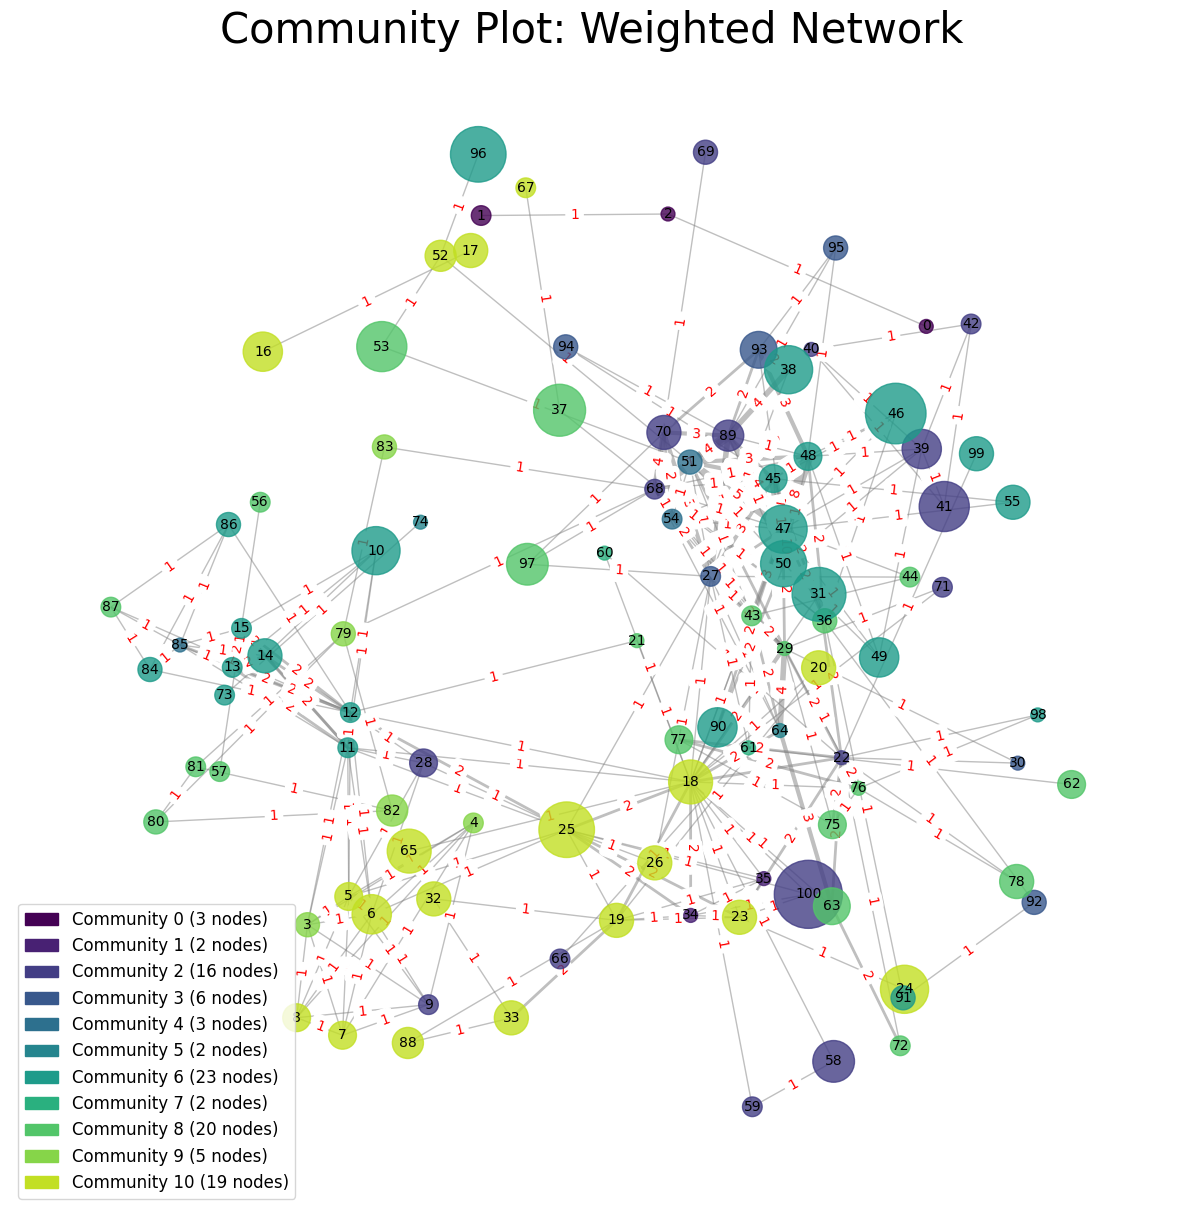

In [51]:
# Visualize the graph
plt.figure(figsize=(15, 15)) 

# Use spring layout with a higher k value to spread nodes apart
pos = nx.spring_layout(G, k=0.5)
cmap = plt.get_cmap('viridis')

# Drawing nodes
# node_sizes = [degree[node] * 100 for node in G.nodes()]
community_colors = [cmap(i / len(communities)) for i in range(len(communities))]
node_colors = [community_colors[node_community[node]] for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_community.keys(), node_size=node_sizes, node_color=node_colors, alpha=0.8)

# Drawing edges
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5, edge_color='gray')

# Adding labels
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Adding edge weight labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Create legend
patches = [mpatches.Patch(color=community_colors[i], label=f'Community {i} ({len(communities[i])} nodes)') for i in range(len(communities))]
plt.legend(handles=patches, loc='best', fontsize=12)

# Title
plt.title('Community Plot: Weighted Network', fontsize=30)

# Show plot
plt.axis('off')
plt.show()

In [52]:
list(G.neighbors(70))

[68, 54, 89, 93, 27, 97]

## LABELS

Clan and boss rank

In [53]:
# labels for node 39 and 70 are proxy (for now I put the average of the neighbors)
label_clan = {
    0: 'Civilian',
    1: 'Civilian',
    2: 'Clan_1',
    3: 'Clan_2',
    4: 'Civilian',
    5: 'Civilian',
    6: 'Civilian',
    7: 'Civilian',
    8: 'Civilian',
    9: 'Civilian',
    10: 'Civilian',
    11: 'Mistretta',
    12: 'Mistretta',
    13: 'Mistretta',
    14: 'Clan_1',
    15: 'Civilian',
    16: 'Civilian',
    17: 'Civilian',
    18: 'Mistretta',
    19: 'Civilian',
    20: 'Civilian',
    21: 'Civilian',
    22: 'Mistretta',
    23: 'Civilian',
    24: 'Civilian',
    25: 'Mistretta',
    26: 'Civilian',
    27: 'Batanesi',
    28: 'Civilian',
    29: 'Mistretta',
    30: 'Civilian',
    31: 'Civilian',
    32: 'Mistretta',
    33: 'Civilian',
    34: 'Civilian',
    35: 'Civilian',
    36: 'Batanesi',
    37: 'Mistretta',
    38: 'Batanesi',
    39: 'Batanesi',     # PROXY
    40: 'Clan_1',
    41: 'Clan_1',
    42: 'Clan_1',
    43: 'Batanesi',
    44: 'Batanesi',
    45: 'Batanesi',
    46: 'Batanesi',
    47: 'Batanesi',
    48: 'Batanesi',
    49: 'Batanesi',
    50: 'Batanesi',
    51: 'Batanesi',
    52: 'Civilian',
    53: 'Civilian',
    54: 'Civilian',
    55: 'Clan_1',
    56: 'Batanesi',
    57: 'Civilian',
    58: 'Civilian',
    59: 'Civilian',
    60: 'Civilian',
    61: 'Mistretta',
    62: 'Civilian',
    63: 'Civilian',
    64: 'Civilian',
    65: 'Civilian',
    66: 'Civilian',
    67: 'Civilian',
    68: 'Batanesi',
    69: 'Mistretta',
    70: 'Batanesi',     # PROXY
    71: 'Civilian',
    72: 'Civilian',
    73: 'Civilian',
    74: 'Civilian',
    75: 'Mistretta',
    76: 'Civilian',
    77: 'Mistretta',
    78: 'Civilian',
    79: 'Civilian',
    80: 'Civilian',
    81: 'Civilian',
    82: 'Civilian',
    83: 'Civilian',
    84: 'Civilian',
    85: 'Civilian',
    86: 'Civilian',
    87: 'Civilian',
    88: 'Civilian',
    89: 'Batanesi',
    90: 'Batanesi',
    91: 'Civilian',
    92: 'Civilian',
    93: 'Civilian',
    94: 'Civilian',
    95: 'Batanesi',
    96: 'Civilian',
    97: 'Batanesi',
    98: 'Civilian',
    99: 'Civilian',
    100: 'Civilian'
}


In [65]:
# label for bosses
label_rank = {
    0: 'unranked',
    1: 'unranked',
    2: 'boss',
    3: 'boss',
    4: 'unranked',
    5: 'unranked',
    6: 'unranked',
    7: 'unranked',
    8: 'unranked',
    9: 'unranked',
    10: 'unranked',
    11: 'unranked',
    12: 'unranked',
    13: 'unranked',
    14: 'boss',
    15: 'unranked',
    16: 'unranked',
    17: 'unranked',
    18: 'boss',
    19: 'unranked',
    20: 'unranked',
    21: 'unranked',
    22: 'unranked',
    23: 'unranked',
    24: 'unranked',
    25: 'boss',
    26: 'unranked',
    27: 'boss',
    28: 'unranked',
    29: 'unranked',
    30: 'unranked',
    31: 'unranked',
    32: 'unranked',
    33: 'unranked',
    34: 'unranked',
    35: 'unranked',
    36: 'unranked',
    37: 'boss',
    38: 'unranked',
    39: 'unranked',
    40: 'boss',
    41: 'boss',
    42: 'boss',
    43: 'unranked',
    44: 'unranked',
    45: 'unranked',
    46: 'boss',
    47: 'unranked',
    48: 'unranked',
    49: 'unranked',
    50: 'unranked',
    51: 'unranked',
    52: 'unranked',
    53: 'unranked',
    54: 'unranked',
    55: 'boss',
    56: 'unranked',
    57: 'unranked',
    58: 'unranked',
    59: 'unranked',
    60: 'unranked',
    61: 'unranked',
    62: 'unranked',
    63: 'unranked',
    64: 'unranked',
    65: 'unranked',
    66: 'unranked',
    67: 'unranked',
    68: 'boss',
    69: 'unranked',
    70: 'unranked',
    71: 'unranked',
    72: 'unranked',
    73: 'unranked',
    74: 'unranked',
    75: 'unranked',
    76: 'unranked',
    77: 'unranked',
    78: 'unranked',
    79: 'unranked',
    80: 'unranked',
    81: 'unranked',
    82: 'unranked',
    83: 'unranked',
    84: 'unranked',
    85: 'unranked',
    86: 'unranked',
    87: 'unranked',
    88: 'unranked',
    89: 'unranked',
    90: 'unranked',
    91: 'unranked',
    92: 'unranked',
    93: 'unranked',
    94: 'unranked',
    95: 'unranked',
    96: 'unranked',
    97: 'unranked',
    98: 'unranked',
    99: 'unranked',
    100: 'unranked'
}


In [66]:
# Create new Graph with labels
Gl = G.copy()

# set the clan and boss labels
nx.set_node_attributes(Gl, values=label_clan, name='clan')
nx.set_node_attributes(Gl, values=label_rank, name='rank')

##### Plot

C:\Users\Enrico\AppData\Local\Temp\ipykernel_440\189105110.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral', len(unique_labels))  # Using 'Spectral' colormap for distinct colors


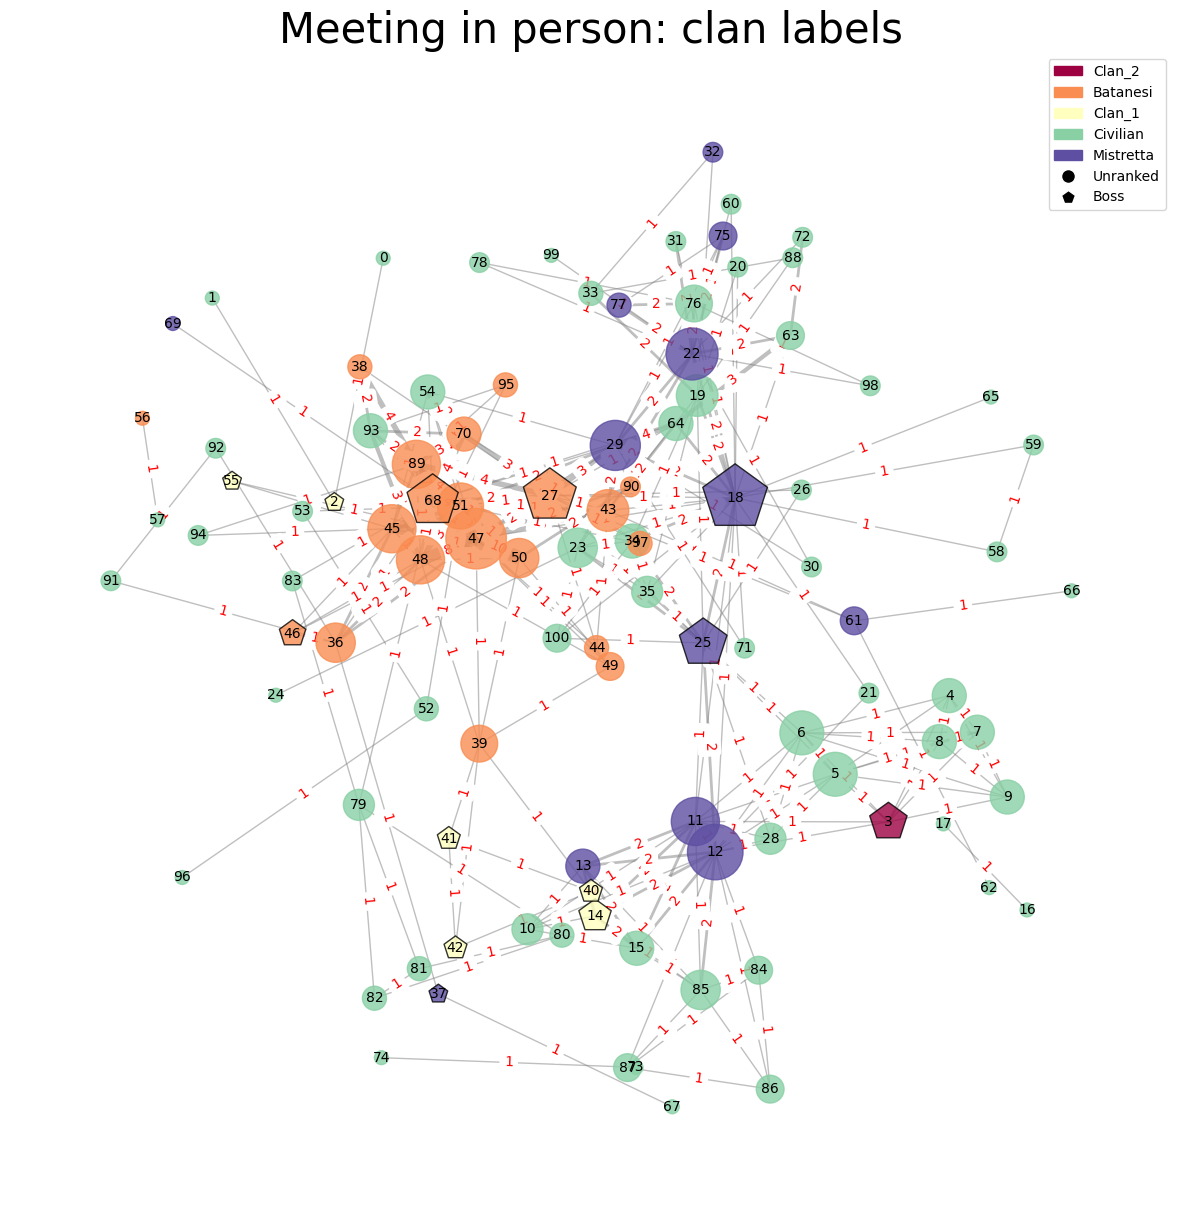

In [74]:
# Extract unique labels and assign a color to each label
unique_labels = list(set(label_clan.values()))
cmap = cm.get_cmap('Spectral', len(unique_labels))  # Using 'Spectral' colormap for distinct colors
label_to_color = {label: cmap(i / len(unique_labels)) for i, label in enumerate(unique_labels)}

# Create a list of colors for the nodes based on their labels
node_colors = [label_to_color[label_clan[node]] for node in Gl.nodes()]

# Define node shapes based on rank
rank_to_shape = {'unranked': 'o', 'boss': 'p'}

# Separate nodes by rank
unranked_nodes = [node for node in Gl.nodes() if Gl.nodes[node].get('rank') == 'unranked']
boss_nodes = [node for node in Gl.nodes() if Gl.nodes[node].get('rank') == 'boss']

# Create separate size lists for unranked and boss nodes
unranked_sizes = [node_sizes[list(Gl.nodes()).index(node)] for node in unranked_nodes]
boss_sizes = [node_sizes[list(Gl.nodes()).index(node)] for node in boss_nodes]

# Visualize the graph
plt.figure(figsize=(15, 15))

# Use spring layout with a higher k value to spread nodes apart
pos = nx.spring_layout(Gl, k=0.5)

# Drawing unranked nodes
nx.draw_networkx_nodes(Gl, pos, nodelist=unranked_nodes, node_shape=rank_to_shape['unranked'], 
                       node_size=unranked_sizes, alpha=0.8, node_color=[label_to_color[label_clan[node]] for node in unranked_nodes])

# Drawing boss nodes
nx.draw_networkx_nodes(Gl, pos, nodelist=boss_nodes, node_shape=rank_to_shape['boss'], 
                       node_size=boss_sizes, alpha=0.8, edgecolors='black', node_color=[label_to_color[label_clan[node]] for node in boss_nodes])

# Drawing edges
edge_weights = [Gl[u][v].get('weight', 1) for u, v in Gl.edges()]
nx.draw_networkx_edges(Gl, pos, width=edge_weights, alpha=0.5, edge_color='gray')

# Adding labels
nx.draw_networkx_labels(Gl, pos, font_size=10, font_color='black')

# Adding edge weight labels
edge_labels = nx.get_edge_attributes(Gl, 'weight')
nx.draw_networkx_edge_labels(Gl, pos, edge_labels=edge_labels, font_color='red')

# Creating legend
# Clan color legend
clan_patches = [mpatches.Patch(color=label_to_color[label], label=label) for label in unique_labels]

# Rank shape legend
rank_lines = [Line2D([0], [0], marker=rank_to_shape['unranked'], color='w', markerfacecolor='k', markersize=10, label='Unranked'),
              Line2D([0], [0], marker=rank_to_shape['boss'], color='w', markerfacecolor='k', markersize=10, label='Boss')]

# Combine legends
legend_elements = clan_patches + rank_lines

plt.legend(handles=legend_elements, loc='best')

# Title
plt.title('Meeting in person: clan labels', fontsize=30)

# Show plot
plt.axis('off')
plt.show()


### Labels description

In [56]:
# labels count
label_counts = Counter(nx.get_node_attributes(Gl, 'clan').values())
label_percentages = {l: c / Gl.order() for l, c in label_counts.items()}

print(f'Nodes per label: {label_counts}')
print(f'Proportion nodes per label: {label_percentages}')


Nodes per label: Counter({'Civilian': 61, 'Batanesi': 20, 'Mistretta': 13, 'Clan_1': 6, 'Clan_2': 1})
Proportion nodes per label: {'Civilian': 0.6039603960396039, 'Clan_1': 0.0594059405940594, 'Clan_2': 0.009900990099009901, 'Mistretta': 0.12871287128712872, 'Batanesi': 0.19801980198019803}


### Assortativity

In [57]:
assortativity = nx.attribute_assortativity_coefficient(Gl, 'clan')
print('Assortativiti by label', assortativity)

Assortativiti by label 0.28620607921261426


### Bosses statistics

In [83]:
bosses = []
for i in range(Gl.order()):
    if dict(Gl.nodes.data(data='rank'))[i] == 'boss':
        bosses.append(i)

bosses_batanesi = []
bosses_mistretta = []
for i in range(Gl.order()):
    if dict(Gl.nodes.data(data='rank'))[i] == 'boss':
        if dict(Gl.nodes.data(data='clan'))[i] == 'Batanesi':
            bosses_batanesi.append(i)
        elif dict(Gl.nodes.data(data='clan'))[i] == 'Mistretta':
            bosses_mistretta.append(i)


print(f'Mistretta Bosses = {bosses_mistretta}')
print(f'Batanesi Bosses = {bosses_batanesi}')


Mistretta Bosses = [18, 25, 37]
Batanesi Bosses = [27, 46, 68]


In [93]:
# DEGREE
degree_l = dict(Gl.degree(weight='weight'))
print('WEIGHTED')
print('Mistretta Bosses:')
for key in bosses_mistretta:
    print(f'Boss {key} degree = {degree_l[key]}')
print('Batanesi Bosses:')
for key in bosses_batanesi:
    print(f'Boss {key} degree = {degree_l[key]}')

# CENTRALITY
print('Mistretta Bosses:')
for key in bosses_mistretta:
    print(f'Boss {key} Centratilty: norm = {norm_centrality[key]}, betweeness = {betweenness_centrality[key]:.3f}, closeness = {closeness_centrality[key]:.3f}, eigenvector = {eigenvector_centrality[key]:.3f}')
print('Batanesi Bosses:')
for key in bosses_batanesi:
    print(f'Boss {key} Centratilty: norm = {norm_centrality[key]}, betweeness = {betweenness_centrality[key]:.3f}, closeness = {closeness_centrality[key]:.3f}, eigenvector = {eigenvector_centrality[key]:.3f}')


WEIGHTED
Mistretta Bosses:
Boss 18 degree = 30
Boss 25 degree = 17
Boss 37 degree = 2
Batanesi Bosses:
Boss 27 degree = 27
Boss 46 degree = 4
Boss 68 degree = 25
Mistretta Bosses:
Boss 18 Centratilty: norm = 0.3, betweeness = 0.418, closeness = 0.382, eigenvector = 0.064
Boss 25 Centratilty: norm = 0.17, betweeness = 0.082, closeness = 0.289, eigenvector = 0.019
Boss 37 Centratilty: norm = 0.02, betweeness = 0.018, closeness = 0.193, eigenvector = 0.005
Batanesi Bosses:
Boss 27 Centratilty: norm = 0.27, betweeness = 0.132, closeness = 0.335, eigenvector = 0.231
Boss 46 Centratilty: norm = 0.04, betweeness = 0.018, closeness = 0.267, eigenvector = 0.054
Boss 68 Centratilty: norm = 0.25, betweeness = 0.201, closeness = 0.319, eigenvector = 0.219


# ML: NODE CLASSIFICATION

## NODE2VEC

In [58]:
from node2vec import Node2Vec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb


c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [59]:
# Generate walks and create embeddings
node2vec = Node2Vec(Gl, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Create a mapping from node to embedding
embeddings = {str(node): model.wv[str(node)] for node in Gl.nodes()}

# Extract features and labels
X = []
y = []

for node in Gl.nodes(data=True):
    X.append(embeddings[str(node[0])])
    y.append(node[1]['clan'])

X = np.array(X)
y = np.array(y)

# Encode labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=69)


Computing transition probabilities: 100%|██████████| 101/101 [00:00<00:00, 7197.52it/s]

#### Random Forest 

In [60]:
# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=69)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=69)

In [61]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# Ensure the target_names only include classes present in y_test
present_classes = np.unique(y_test)
target_names = [label_encoder.inverse_transform([cls])[0] for cls in present_classes]

print("Classification Report Random Forest:")
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.8571428571428571
Classification Report Random Forest:
              precision    recall  f1-score   support

    Batanesi       0.60      1.00      0.75         3
    Civilian       0.94      0.88      0.91        17
   Mistretta       0.00      0.00      0.00         1

    accuracy                           0.86        21
   macro avg       0.51      0.63      0.55        21
weighted avg       0.84      0.86      0.84        21



c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

#### XGBoost

In [62]:
# Generate walks and create embeddings
node2vec = Node2Vec(Gl, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Create a mapping from node to embedding
embeddings = {str(node): model.wv[str(node)] for node in Gl.nodes()}

# Extract features and labels
X = []
y = []

for node in Gl.nodes(data=True):
    X.append(embeddings[str(node[0])])
    y.append(node[1]['clan'])

X = np.array(X)
y = np.array(y)

# Encode labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=69)


Computing transition probabilities: 100%|██████████| 101/101 [00:00<00:00, 5288.96it/s]


In [63]:
# Train an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=5, random_state=69)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# Ensure the target_names only include classes present in y_test
present_classes = np.unique(y_test)
target_names = [label_encoder.inverse_transform([cls])[0] for cls in present_classes]

print("Classification Report XGBoost:")
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.7619047619047619
Classification Report XGBoost:
              precision    recall  f1-score   support

    Batanesi       0.33      0.33      0.33         3
    Civilian       0.83      0.88      0.86        17
   Mistretta       0.00      0.00      0.00         1

    accuracy                           0.76        21
   macro avg       0.39      0.41      0.40        21
weighted avg       0.72      0.76      0.74        21



c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera